<a href="https://colab.research.google.com/github/NicolasFercha/ChallengeTelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import json
import pandas as pd

# Ruta del archivo en Colab
TelecomData = 'TelecomX_Data.json'

# Abrir y cargar el archivo JSON
with open(TelecomData) as f:
    data = json.load(f)

# Vista previa
print("Número de registros:", len(data))
print("Ejemplo de entrada JSON:")
print(json.dumps(data[0], indent=2))

Número de registros: 7267
Ejemplo de entrada JSON:
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


In [3]:
from pandas import json_normalize

# Convertir JSON a DataFrame plano
df = json_normalize(data)

# Vista general del DataFrame
print(df.shape)
df.head()

(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Renombrar columnas
df.columns = df.columns.str.replace('customer.', '')
df.columns = df.columns.str.replace('phone.', '')
df.columns = df.columns.str.replace('internet.', '')
df.columns = df.columns.str.replace('account.', '')
df.columns = df.columns.str.replace('Charges.', 'Charges_')

# Revisar columnas
df.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

#🔧 Transformación

In [5]:
# Información general del DataFrame
df.info()

# Ver un resumen estadístico (solo columnas numéricas)
df.describe()

# Ver las primeras filas para una inspección manual
df.tail(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7217,9927-DSWDF,No,Male,0,Yes,No,22,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.60,2180.55
7218,9928-BZVLZ,No,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.1
7219,9929-PLVPA,No,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.40,94.5
7220,9931-DCEZH,No,Male,0,No,Yes,28,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.40,1516.6
7221,9931-KGHOA,No,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95
7222,9932-WBWIK,No,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25
7223,9933-QRGTX,No,Female,0,Yes,No,60,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75
7224,9938-EKRGF,No,Female,0,No,No,15,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85
7225,9938-PRCVK,No,Female,0,Yes,Yes,41,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25
7226,9938-TKDGL,No,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.55,6668


In [6]:
df['Churn'].value_counts(dropna=False)
df.tail(50)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7217,9927-DSWDF,No,Male,0,Yes,No,22,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.60,2180.55
7218,9928-BZVLZ,No,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.1
7219,9929-PLVPA,No,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.40,94.5
7220,9931-DCEZH,No,Male,0,No,Yes,28,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.40,1516.6
7221,9931-KGHOA,No,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95
7222,9932-WBWIK,No,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25
7223,9933-QRGTX,No,Female,0,Yes,No,60,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75
7224,9938-EKRGF,No,Female,0,No,No,15,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85
7225,9938-PRCVK,No,Female,0,Yes,Yes,41,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25
7226,9938-TKDGL,No,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.55,6668


In [7]:
# Limpieza robusta de la columna 'Churn'
df['Churn'] = df['Churn'].astype(str).str.strip()            # Paso 1
df = df[df['Churn'].isin(['Yes', 'No'])]                     # Paso 2
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})    # Paso 3

# Verificar
print(df['Churn'].value_counts())
df.tail(50)


Churn
False    5174
True     1869
Name: count, dtype: int64


<ipython-input-7-efd7ca27d9b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})    # Paso 3


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7215,9924-JPRMC,False,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15
7216,9926-PJHDQ,False,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),76.80,5468.45
7217,9927-DSWDF,False,Male,0,Yes,No,22,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.60,2180.55
7218,9928-BZVLZ,False,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.1
7219,9929-PLVPA,False,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.40,94.5
7220,9931-DCEZH,False,Male,0,No,Yes,28,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.40,1516.6
7221,9931-KGHOA,False,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95
7222,9932-WBWIK,False,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25
7223,9933-QRGTX,False,Female,0,Yes,No,60,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75
7224,9938-EKRGF,False,Female,0,No,No,15,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [9]:
# Paso 1: Convertir todos los valores a string y eliminar espacios
df_clean = df.copy()
df_clean = df_clean.applymap(lambda x: str(x).strip() if pd.notnull(x) else x)

# Paso 2: Contar valores nulos
missing_counts = df_clean.isnull().sum()

# Paso 3: Contar valores vacíos o espacios en blanco
blank_counts = (df_clean == '').sum()

# Paso 4: Sumar ambos para ver datos "inválidos"
invalid_counts = missing_counts + blank_counts

# Mostrar resumen
print("Valores inválidos por columna (NaN + vacíos):")
print(invalid_counts.sort_values(ascending=False))


<ipython-input-9-ac222b91267c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: str(x).strip() if pd.notnull(x) else x)


Valores inválidos por columna (NaN + vacíos):
Charges_Total       11
Churn                0
gender               0
SeniorCitizen        0
customerID           0
Partner              0
Dependents           0
PhoneService         0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
StreamingTV          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges_Monthly      0
dtype: int64


In [10]:
# Reemplazar strings vacíos con NaN
df['Charges_Total'] = df['Charges_Total'].replace(' ', pd.NA)

# Convertir a tipo float
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

# Verificar cuántos valores faltan tras la conversión
print("Valores nulos en Charges_Total:", df['Charges_Total'].isna().sum())

Valores nulos en Charges_Total: 11


In [11]:
df['Charges_Total'] = df['Charges_Total'].fillna(df['Charges_Total'].mean())

In [12]:
# Paso 1: Convertir todos los valores a string y eliminar espacios
df_clean = df.copy()
df_clean = df_clean.applymap(lambda x: str(x).strip() if pd.notnull(x) else x)

# Paso 2: Contar valores nulos
missing_counts = df_clean.isnull().sum()

# Paso 3: Contar valores vacíos o espacios en blanco
blank_counts = (df_clean == '').sum()

# Paso 4: Sumar ambos para ver datos "inválidos"
invalid_counts = missing_counts + blank_counts

# Mostrar resumen
print("Valores inválidos por columna (NaN + vacíos):")
print(invalid_counts.sort_values(ascending=False))


<ipython-input-12-ac222b91267c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: str(x).strip() if pd.notnull(x) else x)


Valores inválidos por columna (NaN + vacíos):
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [13]:
df.tail(50)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
7215,9924-JPRMC,False,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15
7216,9926-PJHDQ,False,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),76.80,5468.45
7217,9927-DSWDF,False,Male,0,Yes,No,22,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.60,2180.55
7218,9928-BZVLZ,False,Female,0,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,49.85,552.10
7219,9929-PLVPA,False,Female,0,No,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.40,94.50
7220,9931-DCEZH,False,Male,0,No,Yes,28,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.40,1516.60
7221,9931-KGHOA,False,Female,0,Yes,No,46,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),55.00,2473.95
7222,9932-WBWIK,False,Male,0,No,No,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25
7223,9933-QRGTX,False,Female,0,Yes,No,60,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.20,5611.75
7224,9938-EKRGF,False,Female,0,No,No,15,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,84.45,1287.85


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [15]:
# Lista de columnas categóricas a revisar
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Mostrar valores únicos por cada columna categórica
for col in categorical_cols:
    print(f"\n{col} - valores únicos:")
    print(df[col].value_counts(dropna=False))



gender - valores únicos:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner - valores únicos:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents - valores únicos:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService - valores únicos:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines - valores únicos:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService - valores únicos:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity - valores únicos:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup - valores únicos:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection - valores únicos:
Devic

In [16]:
cols_with_specials = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazar 'No phone service' y 'No internet service' por 'No'
for col in cols_with_specials:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})



In [17]:
# Lista de columnas categóricas a revisar
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Mostrar valores únicos por cada columna categórica
for col in categorical_cols:
    print(f"\n{col} - valores únicos:")
    print(df[col].value_counts(dropna=False))



gender - valores únicos:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner - valores únicos:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents - valores únicos:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService - valores únicos:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines - valores únicos:
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

InternetService - valores únicos:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity - valores únicos:
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

OnlineBackup - valores únicos:
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

DeviceProtection - valores únicos:
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

TechSupport - valores únicos:
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

StreamingTV - v

In [18]:
df['Cuentas_Diarias'] = df['Charges_Monthly'] / 30


In [19]:
# Columnas binarias de tipo Yes/No (ya filtradas previamente)
yes_no_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

# Reemplazar Yes/No por 1/0
df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0}).astype(int)


<ipython-input-19-cbd4e979e12e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0}).astype(int)


In [20]:
df.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'EsAdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'tenure': 'MesesDeAntiguedad',
    'PhoneService': 'TieneTelefono',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'TipoInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturacionOnline',
    'PaymentMethod': 'MetodoPago',
    'Charges_Monthly': 'FacturacionMensual',
    'Charges_Total': 'FacturacionTotal'
}, inplace=True)
df.head()

,ID_Cliente,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,TieneTelefono,MultiplesLineas,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,TV_Streaming,Peliculas_Streaming,TipoContrato,FacturacionOnline,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [21]:
# Análisis estadístico básico
df.describe().T


,count,mean,std,min,25%,50%,75%,max
EsAdultoMayor,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
TienePareja,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
TieneDependientes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
MesesDeAntiguedad,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
TieneTelefono,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
MultiplesLineas,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.000,1.000000
SeguridadOnline,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.000,1.000000
RespaldoOnline,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.000,1.000000
ProteccionDispositivo,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.000,1.000000
SoporteTecnico,7043.0,0.290217,0.453895,0.000000,0.000000,0.000,1.000,1.000000


In [22]:
# Columnas numéricas principales
numeric_cols = ['MesesDeAntiguedad', 'FacturacionMensual', 'FacturacionTotal', 'Cuentas_Diarias']

# Calcular métricas clave
for col in numeric_cols:
    print(f"\n🔍 {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min():.2f}")
    print(f"Máximo: {df[col].max():.2f}")



🔍 MesesDeAntiguedad
Media: 32.37
Mediana: 29.00
Desviación estándar: 24.56
Mínimo: 0.00
Máximo: 72.00

🔍 FacturacionMensual
Media: 64.76
Mediana: 70.35
Desviación estándar: 30.09
Mínimo: 18.25
Máximo: 118.75

🔍 FacturacionTotal
Media: 2283.30
Mediana: 1400.55
Desviación estándar: 2265.00
Mínimo: 18.80
Máximo: 8684.80

🔍 Cuentas_Diarias
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96


In [23]:
# Columnas categóricas principales
categorical_cols = ['Genero', 'EsAdultoMayor', 'TienePareja', 'TieneDependientes', 'TipoInternet',
                    'MetodoPago', 'TipoContrato']

# Distribución de frecuencias
for col in categorical_cols:
    print(f"\n📊 Distribución de '{col}':")
    print(df[col].value_counts(normalize=True).round(3) * 100)



📊 Distribución de 'Genero':
Genero
Male      50.5
Female    49.5
Name: proportion, dtype: float64

📊 Distribución de 'EsAdultoMayor':
EsAdultoMayor
0    83.8
1    16.2
Name: proportion, dtype: float64

📊 Distribución de 'TienePareja':
TienePareja
0    51.7
1    48.3
Name: proportion, dtype: float64

📊 Distribución de 'TieneDependientes':
TieneDependientes
0    70.0
1    30.0
Name: proportion, dtype: float64

📊 Distribución de 'TipoInternet':
TipoInternet
Fiber optic    44.0
DSL            34.4
No             21.7
Name: proportion, dtype: float64

📊 Distribución de 'MetodoPago':
MetodoPago
Electronic check             33.6
Mailed check                 22.9
Bank transfer (automatic)    21.9
Credit card (automatic)      21.6
Name: proportion, dtype: float64

📊 Distribución de 'TipoContrato':
TipoContrato
Month-to-month    55.0
Two year          24.1
One year          20.9
Name: proportion, dtype: float64


In [24]:
# Agrupar por Churn y sacar estadísticas
df.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std'])


MesesDeAntiguedad                   FacturacionMensual          \
                   mean median        std               mean  median   
Churn                                                                  
False         37.569965   38.0  24.113777          61.265124  64.425   
True          17.979133   10.0  19.531123          74.441332  79.650   

                 FacturacionTotal                        Cuentas_Diarias  \
             std             mean    median          std            mean   
Churn                                                                      
False  31.092648      2554.765772  1689.175  2327.012699        2.042171   
True   24.666053      1531.796094   703.550  1890.822994        2.481378   

                         
       median       std  
Churn                    
False  2.1475  1.036422  
True   2.6550  0.822202

<ipython-input-32-599a29b68bc9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


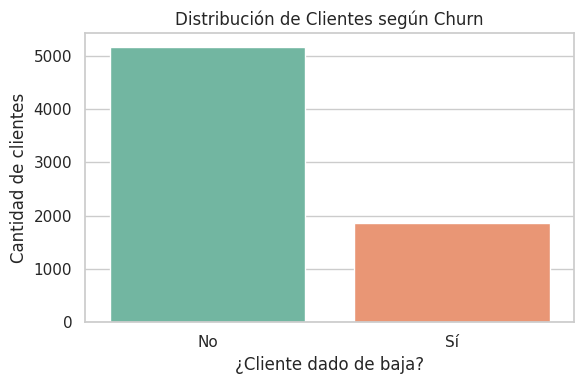

In [32]:
#distribucion de evasion
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Conteo de churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')

# Etiquetas y título
plt.title('Distribución de Clientes según Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])  # si es bool
plt.tight_layout()
plt.show()


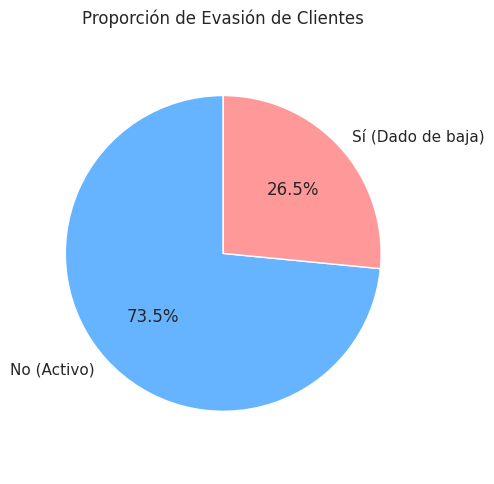

In [27]:
# Valores para el gráfico
churn_counts = df['Churn'].value_counts()
labels = ['No (Activo)', 'Sí (Dado de baja)']
colors = ['#66b3ff', '#ff9999']

# Gráfico
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')
plt.tight_layout()
plt.show()


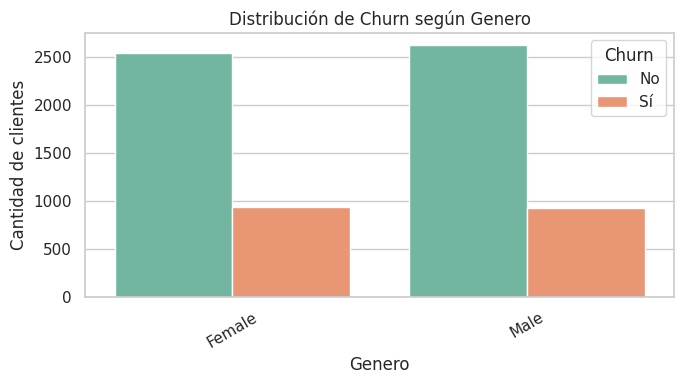

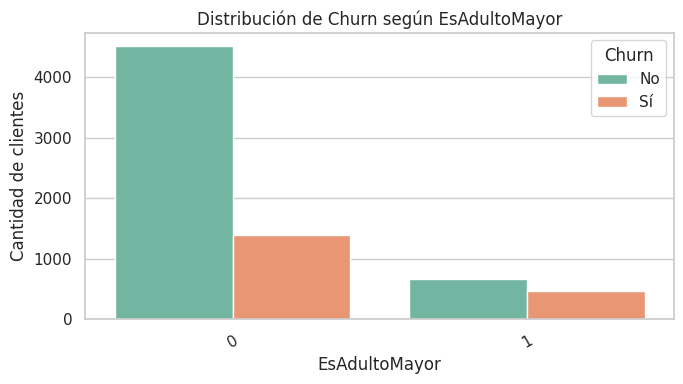

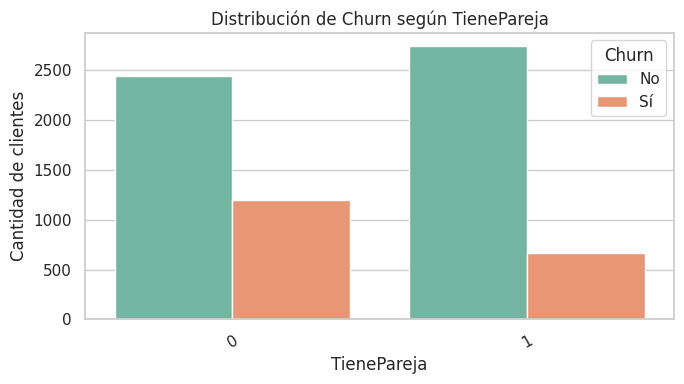

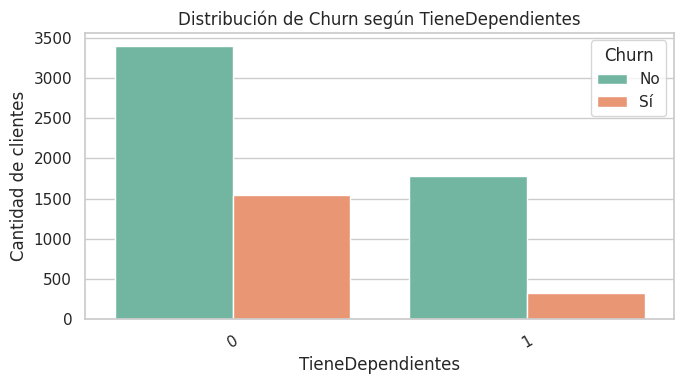

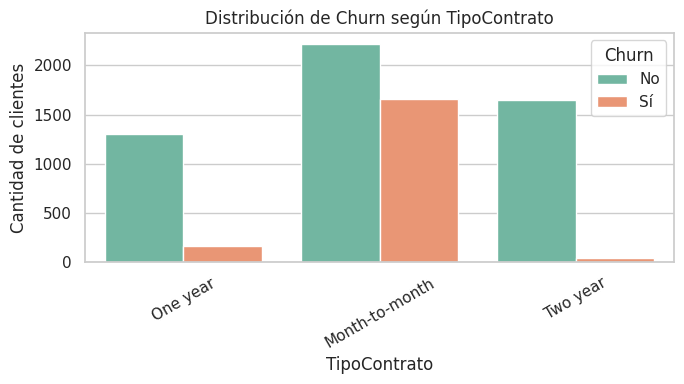

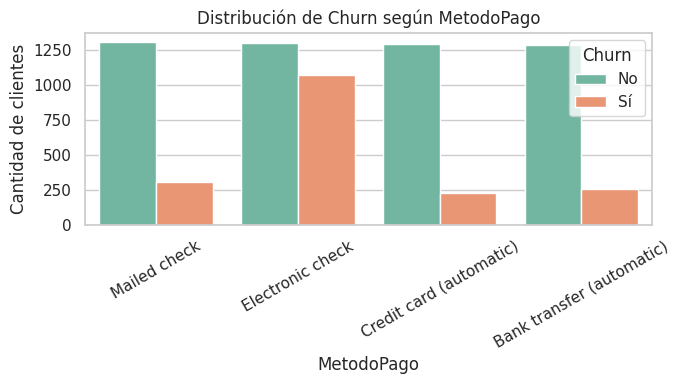

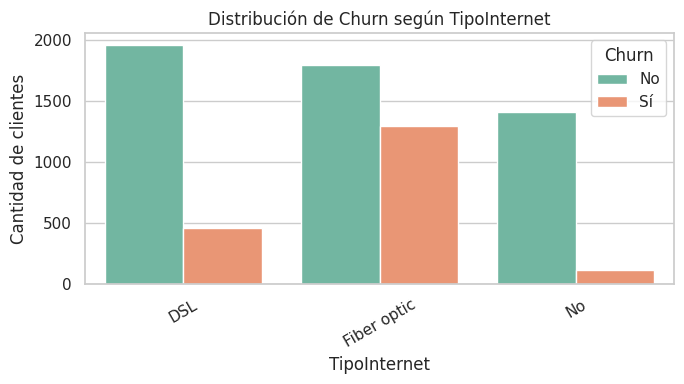

In [28]:
#recuento de evasion por variables catergoricas
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas a analizar
categorical_vars = [
    'Genero', 'EsAdultoMayor', 'TienePareja', 'TieneDependientes',
    'TipoContrato', 'MetodoPago', 'TipoInternet'
]

# Crear un gráfico por cada variable
for col in categorical_vars:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribución de Churn según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=30)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()


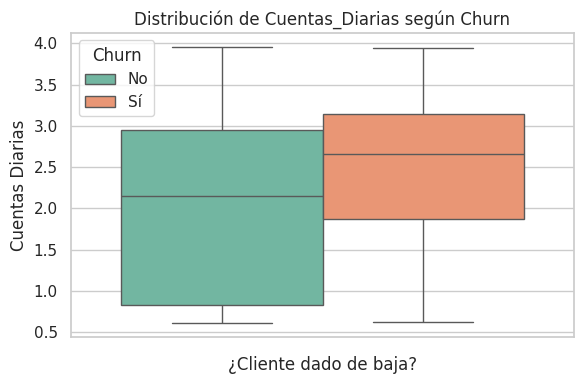

In [34]:
# Crear una copia temporal para visualización
df_viz = df.copy()
df_viz['Churn'] = df_viz['Churn'].map({False: 'No', True: 'Sí'})

# Graficar con etiquetas ya formateadas
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_viz, hue='Churn', y='Cuentas_Diarias', palette='Set2')
plt.title('Distribución de Cuentas_Diarias según Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cuentas Diarias')
plt.tight_layout()
plt.show()



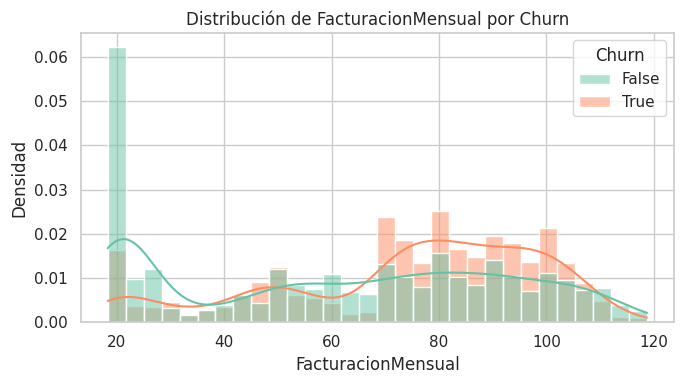

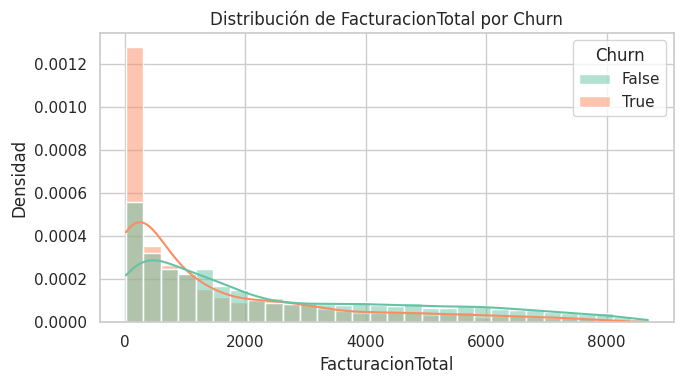

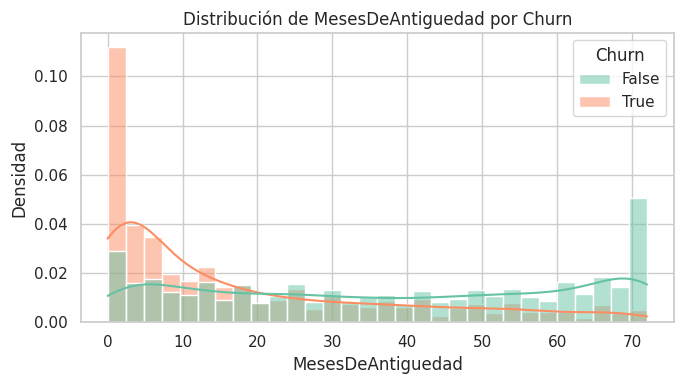

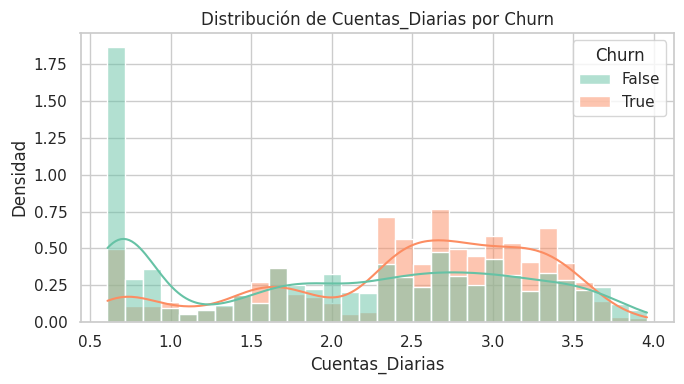

In [35]:
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='Set2', stat='density', common_norm=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()


In [36]:
df.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std'])


FacturacionMensual                    FacturacionTotal            \
                    mean  median        std             mean    median   
Churn                                                                    
False          61.265124  64.425  31.092648      2554.765772  1689.175   
True           74.441332  79.650  24.666053      1531.796094   703.550   

                   MesesDeAntiguedad                   Cuentas_Diarias  \
               std              mean median        std            mean   
Churn                                                                    
False  2327.012699         37.569965   38.0  24.113777        2.042171   
True   1890.822994         17.979133   10.0  19.531123        2.481378   

                         
       median       std  
Churn                    
False  2.1475  1.036422  
True   2.6550  0.822202




#📄Informe final

## **1.Indroduccion**

El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión representa un problema crítico para las organizaciones, ya que implica la pérdida de ingresos y clientes valiosos. Detectar patrones de comportamiento relacionados con la cancelación del servicio permite anticiparse a la fuga de usuarios y tomar decisiones estratégicas para mejorar la retención.

## **2.Limpieza y tratamiento de datos**

Se trabajó con un archivo JSON que contenía la información de más de 7,000 clientes. El proceso de limpieza incluyó:

*     Normalización del JSON para convertirlo en un DataFrame plano.

*     Eliminación de valores vacíos en la columna Charges_Total y su conversión a tipo numérico.

*     Filtrado y mapeo de la variable Churn para convertir "Yes"/"No" en valores booleanos (True/False).

*      Creación de la columna Cuentas_Diarias, a partir de FacturacionMensual, dividiendo entre 30 días.

*      Estandarización de variables categóricas, reemplazando "Yes"/"No" por 1/0 y renombrando columnas a español para mayor claridad.



## **3.analisis exploratorio de datos**

Se realizaron distintos análisis y visualizaciones para comprender mejor los datos:

📊 Distribución de Evasión (Churn)
*    El 26.5% de los clientes cancelaron el servicio, lo cual indica una tasa significativa de evasión.

📉 Variables Categóricas vs Churn
*   Mayor tasa de evasión entre clientes con contrato "Month-to-month".

*   Clientes que pagan con "Electronic check" tienen mayor tendencia a irse.

*   Los que no tienen pareja ni dependientes también presentan más evasión.

*   Clientes con servicios adicionales como Seguridad Online o Respaldo tienden a quedarse más.

📈 Variables Numéricas vs Churn
*   Clientes con menor antigüedad (MesesDeAntiguedad) presentan una mayor tasa de cancelación.

*   Facturación mensual y diaria es más alta entre quienes se dieron de baja, lo que puede sugerir una percepción de alto costo.

*   Clientes que han gastado más en total suelen quedarse, posiblemente porque ya están más comprometidos.

## **4.Conclusiones**

*  El contrato mes a mes es el tipo más riesgoso en términos de evasión. Contratos anuales o bianuales mejoran la retención.

*  El método de pago tiene un impacto directo: Electronic check = mayor riesgo de evasión.

*  La antigüedad del cliente es un fuerte predictor de permanencia. Clientes nuevos se dan de baja más rapido.

*   Servicios adicionales como seguridad y soporte técnico ayudan a reducir la evasión.

## **5.Recomendaciones**

*   Fomentar contratos a largo plazo (One/Two year) ofreciendo descuentos o beneficios.

* Reducir la fricción con métodos de pago automáticos, promoviendo transferencias o tarjetas automáticas.

* Ofrecer servicios adicionales gratuitos o en prueba a clientes nuevos (seguridad, respaldo, soporte).

* Enfocar campañas de retención en clientes con menor antigüedad y mayor facturación mensual.

* Monitorear a los clientes sin pareja ni dependientes, ya que tienden a abandonar más.